# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [24]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


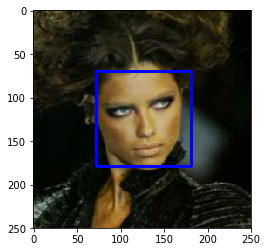

In [27]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[20])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [28]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [8]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

cnt_human = 0
for i in range(len(human_files_short)):
    if(face_detector(human_files_short[i])):
        cnt_human += 1
    if(i%25 == 0):
        print("human ", i)

false_positives = 0
for i in range(len(dog_files_short)):
    if(face_detector(dog_files_short[i])):
        false_positives += 1
    if(i%25 == 0):
        print("dog ", i)

print("Performance on human faces:", cnt_human, " correct detections out of ", len(human_files_short), " human faces.")
print("Performance on dog faces:", false_positives, " false positives out of ", len(dog_files_short), ".")

human  0
human  25
human  50
human  75
dog  0
dog  25
dog  50
dog  75
Performance on human faces: 98  correct detections out of  100  human faces.
Performance on dog faces: 17  false positives out of  100 .


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [32]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [29]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)
# resnet18 = models.resnet18(pretrained=True)
# resnet50 = models.resnet50(pretrained=True)
# alexnet = models.alexnet(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:11<00:00, 48214958.72it/s]


In [36]:
print(VGG16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [37]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    img = Image.open(img_path)
    
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    
    preprocess = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224),
                                    transforms.ToTensor(), normalize])
    
    tensor_image = preprocess(img).unsqueeze_(0)
    
    if use_cuda:
        tensor_image = tensor_image.cuda()
    
    VGG16.eval()
    
    with torch.no_grad():
        pred = torch.argmax(VGG16(tensor_image)).item()
    
    return pred # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [32]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    pred = VGG16_predict(img_path)
    #print(pred)
    return ((pred >= 151) and (pred <= 268))# true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ I used preprocessing. Resizingto 256x256, then centercropping 224x224, then converting to tensor, and then normalizing with the values from the pytorch manual. 

VGG16

0% dogs detected in human_files_short

100% accuracy in dog_files_short



RESNET50

0% dogs detected in human_files_short

100% accuracy in dog_files_short



ALEXNET

1% dogs detected in human_files_short

99% accuracy in dog_files_short

In [13]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

cnt = 0
false_positives = 0
for human_path in human_files_short:
    if(dog_detector(human_path)):
        false_positives += 1
    cnt += 1
    if(cnt%25 == 0):
        print("humans: ", cnt, "   dogs detected: ", false_positives)        

cnt = 0
detected = 0
for dog_path in dog_files_short:
    if(dog_detector(dog_path)):
        detected += 1
    cnt += 1
    if(cnt%25 == 0):
        print("dogs: ", cnt, "   dogs detected: ", detected)
        
        
print("false positives (human faces in dog faces folder): ", false_positives)
print("dog faces detected in dog faces folder: ", detected)

humans:  25    dogs detected:  0
humans:  50    dogs detected:  0
humans:  75    dogs detected:  0
humans:  100    dogs detected:  0
dogs:  25    dogs detected:  25
dogs:  50    dogs detected:  50
dogs:  75    dogs detected:  75
dogs:  100    dogs detected:  100
false positives (human faces in dog faces folder):  0
dog faces detected in dog faces folder:  100


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [39]:
resnet50 = models.resnet50(pretrained=True)
alexnet = models.alexnet(pretrained=True)

In [44]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.
def model_predict(img_path, model):
    img = Image.open(img_path)
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    preprocess = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224),
                                    transforms.ToTensor(), normalize])
    
    # just testing the effect of the preprocessing step without resizing and normalizing
    #preprocess = transforms.Compose([transforms.CenterCrop(224),
    #                                transforms.ToTensor()])
    
    tensor_image = preprocess(img).unsqueeze_(0)
    if(model == "resnet50"):
        resnet50.eval()
        with torch.no_grad():
            pred = torch.argmax(resnet50(tensor_image)).item()
    if(model == "alexnet"):
        alexnet.eval()
        with torch.no_grad():
            pred = torch.argmax(alexnet(tensor_image)).item()
    if(model == "vgg16"):
        VGG16.eval() 
        with torch.no_grad():
            pred = torch.argmax(VGG16(tensor_image)).item()
            
    return pred # predicted class index

def dog_detector(img_path, model):
    pred = model_predict(img_path, model)
    return ((pred >= 151) and (pred <= 268))# true/false


In [45]:
cnt = 0
false_positives = 0
for human_path in human_files_short:
    if(dog_detector(human_path, "resnet50")):
        false_positives += 1
    cnt += 1
    if(cnt%25 == 0):
        print("RESNET50 humans: ", cnt, "   dogs detected: ", false_positives)        

cnt = 0
detected = 0
for dog_path in dog_files_short:
    if(dog_detector(dog_path, "resnet50")):
        detected += 1
    cnt += 1
    if(cnt%25 == 0):
        print("RESNET50 dogs: ", cnt, "   dogs detected: ", detected)
        
print("RESNET50 false positives (human faces in dog faces folder): ", false_positives)
print("RESNET50 dog faces detected in dog faces folder: ", detected)

RESNET50 humans:  25    dogs detected:  0
RESNET50 humans:  50    dogs detected:  0
RESNET50 humans:  75    dogs detected:  0
RESNET50 humans:  100    dogs detected:  0
RESNET50 dogs:  25    dogs detected:  25
RESNET50 dogs:  50    dogs detected:  50
RESNET50 dogs:  75    dogs detected:  75
RESNET50 dogs:  100    dogs detected:  100
RESNET50 false positives (human faces in dog faces folder):  0
RESNET50 dog faces detected in dog faces folder:  100


In [46]:
cnt = 0
false_positives = 0
for human_path in human_files_short:
    if(dog_detector(human_path, "alexnet")):
        false_positives += 1
    cnt += 1
    if(cnt%25 == 0):
            print("ALEXNET humans: ", cnt, "   dogs detected: ", false_positives)        

cnt = 0
detected = 0
for dog_path in dog_files_short:
    if(dog_detector(dog_path, "alexnet")):
        detected += 1
    cnt += 1
    if(cnt%25 == 0):
        print("ALEXNET dogs: ", cnt, "   dogs detected: ", detected)
        
print("ALEXNET false positives (human faces in dog faces folder): ", false_positives)
print("ALEXNET dog faces detected in dog faces folder: ", detected)

ALEXNET humans:  25    dogs detected:  1
ALEXNET humans:  50    dogs detected:  1
ALEXNET humans:  75    dogs detected:  1
ALEXNET humans:  100    dogs detected:  1
ALEXNET dogs:  25    dogs detected:  25
ALEXNET dogs:  50    dogs detected:  50
ALEXNET dogs:  75    dogs detected:  75
ALEXNET dogs:  100    dogs detected:  99
ALEXNET false positives (human faces in dog faces folder):  1
ALEXNET dog faces detected in dog faces folder:  99


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [1]:
import os
import torch
from torchvision import datasets, transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

#normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], 
#                                 std=[0.229, 0.224, 0.225])
normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5], 
                                 std=[0.5, 0.5, 0.5])

transforms_train = transforms.Compose([transforms.Resize(256), 
                                       transforms.CenterCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomRotation(15),
                                       transforms.ToTensor(),
                                       normalize])

transforms_valid = transforms.Compose([transforms.Resize(256), 
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       normalize])

data_dir = "../../../data/dog_images/"
train_dir = os.path.join(data_dir, "train/")
valid_dir = os.path.join(data_dir, "valid/")
test_dir = os.path.join(data_dir, "test/")
train_data = datasets.ImageFolder(train_dir, transform=transforms_train)
valid_data = datasets.ImageFolder(valid_dir, transform=transforms_valid)
test_data = datasets.ImageFolder(test_dir, transform=transforms_valid)

train_loader = torch.utils.data.DataLoader(train_data, 
                                           batch_size = 64,  
                                           num_workers = 0, 
                                           shuffle = True)

valid_loader = torch.utils.data.DataLoader(valid_data, 
                                           batch_size = 64,  
                                           num_workers = 0, 
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(test_data, 
                                           batch_size = 64,  
                                           num_workers = 0, 
                                           shuffle = False)

In [2]:
print(train_data.classes)

# this is the number of output classes. 
# used below in the final linear layer output.
print(len(train_data.classes))

['001.Affenpinscher', '002.Afghan_hound', '003.Airedale_terrier', '004.Akita', '005.Alaskan_malamute', '006.American_eskimo_dog', '007.American_foxhound', '008.American_staffordshire_terrier', '009.American_water_spaniel', '010.Anatolian_shepherd_dog', '011.Australian_cattle_dog', '012.Australian_shepherd', '013.Australian_terrier', '014.Basenji', '015.Basset_hound', '016.Beagle', '017.Bearded_collie', '018.Beauceron', '019.Bedlington_terrier', '020.Belgian_malinois', '021.Belgian_sheepdog', '022.Belgian_tervuren', '023.Bernese_mountain_dog', '024.Bichon_frise', '025.Black_and_tan_coonhound', '026.Black_russian_terrier', '027.Bloodhound', '028.Bluetick_coonhound', '029.Border_collie', '030.Border_terrier', '031.Borzoi', '032.Boston_terrier', '033.Bouvier_des_flandres', '034.Boxer', '035.Boykin_spaniel', '036.Briard', '037.Brittany', '038.Brussels_griffon', '039.Bull_terrier', '040.Bulldog', '041.Bullmastiff', '042.Cairn_terrier', '043.Canaan_dog', '044.Cane_corso', '045.Cardigan_welsh_

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: Used the same size as VGG16 which is 224x224. Resized to 256 then centercropped to 224. It will make it easier to compare to pretrained models like VGG16.

Augmented the dataset with Random horizontal flipping and random rotations of 15 degrees. 

Normalized the images with the same values from the pytorch manual.
mean=[0.485, 0.456, 0.406] and 
std=[0.229, 0.224, 0.225]

I may try different values like 
mean=[0.5, 0.5, 0.5] and 
std=[0.5, 0.5, 0.5]

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [3]:
import torch.nn as nn
import torch.nn.functional as F

num_classes = len(train_data.classes)
print(num_classes)

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        # convolutional layer 1 (sees 224x224x3 image tensor)
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        
        # convolutional layer 2 (sees 112x112x32 image tensor)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        
        # convolutional layer 3 (sees 56x56x64 image tensor)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        
        # convolutional layer 4 (sees 28x28x128 image tensor)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        
        # convolutional layer 5 (sees 14x14x256 image tensor)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        # after maxpooling the output will be 7x7x512
        
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # dropout layer (p=0.35)
        self.dropout = nn.Dropout(0.35)
        
        # fully connected linear layer 1 (7x7x512 = 25088)
        self.fc1 = nn.Linear(7 * 7 * 512, 512)
        # fully connected linear layer 2 (133 is the number of classes)
        self.fc2 = nn.Linear(512, num_classes)

        
    def forward(self, x):
        ## Define forward behavior
        
        # convolutional layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        
        # Flatten the image input
        x = x.view(-1, 7 * 7 * 512)
        
        x = self.dropout(x)
        # linear layer 1
        x = F.relu(self.fc1(x))
        
        # add dropout layer
        x = self.dropout(x)
        
        # linear layer 2
        x = self.fc2(x)
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

133


In [4]:
print(model_scratch)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.35)
  (fc1): Linear(in_features=25088, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=133, bias=True)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ I used 5 convolutional layers. Each layer had a kernel size of 3x3, stride 1, and padding 1. After each layer used relu activation and maxpooling which downscaled the image size by a factor 2 in both dimensions.  After 5 convolutional and maxpooling layers the input to the linear layer is 7x7x512. I used two dropouts (0.35) to prevent overfitting. There are two linear layers. The output layer has 133 outputs because that's the number of training classes we have. The input to the linear layers is a flattened vector with a length of 25088 (7x7x512). I used CrossEntropyLoss() as my loss function.  

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [6]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
#optimizer_scratch = optim.SGD(model_scratch.parameters(), lr = 0.05)
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr = 0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [5]:
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [34]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            
            # calculate the batch loss
            loss = criterion(output, target)
            
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            
            # perform a single optimization step (parameter update)
            optimizer.step()
            
            # update training loss 
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            if batch_idx % 50 == 0:
                print('Epoch %d, Batch %d train loss: %.6f' %
                  (epoch, batch_idx, train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            with torch.no_grad():
                output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if (valid_loss < valid_loss_min):
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                    valid_loss_min,
                    valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
            
    # return trained model
    return model

# define loaders_scratch
loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

# train the model
model_scratch = train(25, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch 1, Batch 0 train loss: 4.886589
Epoch 1, Batch 50 train loss: 4.889892
Epoch 1, Batch 100 train loss: 4.886733
Epoch: 1 	Training Loss: 4.886780 	Validation Loss: 4.870281
Validation loss decreased (inf --> 4.870281).  Saving model ...
Epoch 2, Batch 0 train loss: 4.880026
Epoch 2, Batch 50 train loss: 4.849699
Epoch 2, Batch 100 train loss: 4.793273
Epoch: 2 	Training Loss: 4.788105 	Validation Loss: 4.641021
Validation loss decreased (4.870281 --> 4.641021).  Saving model ...
Epoch 3, Batch 0 train loss: 4.552594
Epoch 3, Batch 50 train loss: 4.605833
Epoch 3, Batch 100 train loss: 4.600291
Epoch: 3 	Training Loss: 4.598793 	Validation Loss: 4.546642
Validation loss decreased (4.641021 --> 4.546642).  Saving model ...
Epoch 4, Batch 0 train loss: 4.349460
Epoch 4, Batch 50 train loss: 4.526464
Epoch 4, Batch 100 train loss: 4.518296
Epoch: 4 	Training Loss: 4.515913 	Validation Loss: 4.436818
Validation loss decreased (4.546642 --> 4.436818).  Saving model ...
Epoch 5, Batch 0 

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [35]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.381318


Test Accuracy: 22% (184/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [12]:
## TODO: Specify data loaders
import os
import torch
from torchvision import datasets, transforms
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

#normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], 
#                                 std=[0.229, 0.224, 0.225])
normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5], 
                                 std=[0.5, 0.5, 0.5])

transforms_train = transforms.Compose([transforms.Resize(256), 
                                       transforms.CenterCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomRotation(15),
                                       transforms.ToTensor(),
                                       normalize])

transforms_valid = transforms.Compose([transforms.Resize(256), 
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       normalize])

data_dir = "../../../data/dog_images/"
train_dir = os.path.join(data_dir, "train/")
valid_dir = os.path.join(data_dir, "valid/")
test_dir = os.path.join(data_dir, "test/")
train_data = datasets.ImageFolder(train_dir, transform=transforms_train)
valid_data = datasets.ImageFolder(valid_dir, transform=transforms_valid)
test_data = datasets.ImageFolder(test_dir, transform=transforms_valid)

train_loader = torch.utils.data.DataLoader(train_data, 
                                           batch_size = 64,  
                                           num_workers = 0, 
                                           shuffle = True)

valid_loader = torch.utils.data.DataLoader(valid_data, 
                                           batch_size = 64,  
                                           num_workers = 0, 
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(test_data, 
                                           batch_size = 64,  
                                           num_workers = 0, 
                                           shuffle = False)


loaders_transfer = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [13]:
import torchvision.models as models
import torch.nn as nn


## TODO: Specify model architecture 

num_classes = len(train_data.classes)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

#model_transfer = models.vgg16(pretrained=True)
model_transfer = models.resnet50(pretrained=True)

# Freezing all parameters
for param in model_transfer.parameters():
    param.requires_grad = False

last_layers = nn.Sequential(nn.Linear(model_transfer.fc.in_features, 512),
                            nn.ReLU(),
                            nn.Dropout(0.35),
                            nn.Linear(512, num_classes))

model_transfer.fc = last_layers
    
if use_cuda:
    model_transfer = model_transfer.cuda()

In [14]:
print(model_transfer)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ I used the well known resnet50 model. It's been quite successful in Image classification tasks. I replaced its last layer (fc layer) with two sequential linear layers. I also added a dropout layer to avoid overfitting. 

    (0): Linear(in_features=2048, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.35)
    (3): Linear(in_features=512, out_features=133, bias=True)


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [15]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), lr=0.001) 
#optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [16]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            
            # calculate the batch loss
            loss = criterion(output, target)
            
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            
            # perform a single optimization step (parameter update)
            optimizer.step()
            
            # update training loss 
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            if batch_idx % 50 == 0:
                print('Epoch %d, Batch %d train loss: %.6f' %
                  (epoch, batch_idx, train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            with torch.no_grad():
                output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if (valid_loss < valid_loss_min):
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                    valid_loss_min,
                    valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
            
    # return trained model
    return model

# train the model
model_transfer = train(8, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')


Epoch 1, Batch 0 train loss: 4.887837
Epoch 1, Batch 50 train loss: 4.124974
Epoch 1, Batch 100 train loss: 3.198429
Epoch: 1 	Training Loss: 3.138751 	Validation Loss: 1.187513
Validation loss decreased (inf --> 1.187513).  Saving model ...
Epoch 2, Batch 0 train loss: 1.887487
Epoch 2, Batch 50 train loss: 1.375583
Epoch 2, Batch 100 train loss: 1.253331
Epoch: 2 	Training Loss: 1.244646 	Validation Loss: 0.683832
Validation loss decreased (1.187513 --> 0.683832).  Saving model ...
Epoch 3, Batch 0 train loss: 0.921432
Epoch 3, Batch 50 train loss: 0.927691
Epoch 3, Batch 100 train loss: 0.907401
Epoch: 3 	Training Loss: 0.905938 	Validation Loss: 0.595019
Validation loss decreased (0.683832 --> 0.595019).  Saving model ...
Epoch 4, Batch 0 train loss: 0.811260
Epoch 4, Batch 50 train loss: 0.803109
Epoch 4, Batch 100 train loss: 0.770416
Epoch: 4 	Training Loss: 0.773557 	Validation Loss: 0.611301
Epoch 5, Batch 0 train loss: 0.650064
Epoch 5, Batch 50 train loss: 0.718295
Epoch 5, 

In [17]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [18]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.471317


Test Accuracy: 84% (707/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [34]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
from PIL import Image
import torchvision.transforms as transforms


model_transfer.load_state_dict(torch.load('model_transfer.pt'))

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img = Image.open(img_path).convert('RGB')
    
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                     std=[0.229, 0.224, 0.225])

    transforms_img = transforms.Compose([transforms.Resize(256), 
                                           transforms.CenterCrop(224),
                                           transforms.ToTensor(),
                                           normalize])
    
    tensor_image = transforms_img(img).unsqueeze_(0)
    
    if use_cuda:
        tensor_image = tensor_image.cuda()
    
    model_transfer.eval()
    with torch.no_grad():
        pred = torch.argmax(model_transfer(tensor_image)).item()
    
    
    return class_names[pred]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [22]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    plt.imshow(Image.open(img_path))
    plt.show()
    
    if (face_detector(img_path)):
        pred = predict_breed_transfer(img_path)
        print("Hello Human!")
        print("You look like a ... \n")
        print(pred, "!\n")
    elif (dog_detector(img_path)):
        pred = predict_breed_transfer(img_path)
        print("This is a dog!")
        print("This dog looks like a ... \n")
        print(pred, "!\n")
    else:
        print("Neither human nor dog detected!")

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement) 

1. I can train more. I trained for 8 epochs. 
2. I can use more datasets with dog breeds. 
3. Parameter tuning. I can try different optimizers with different learning rates, different drop out layers.
4. I can change the number of convolutional layers and play with the kernel sizes and strides.
5. I can try different models for transfer learning. 

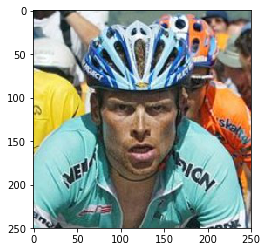

Hello Human!
You look like a ... 

Cardigan welsh corgi !



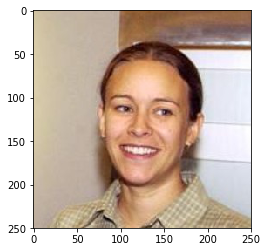

Hello Human!
You look like a ... 

Australian cattle dog !



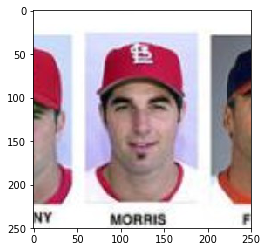

Hello Human!
You look like a ... 

Icelandic sheepdog !



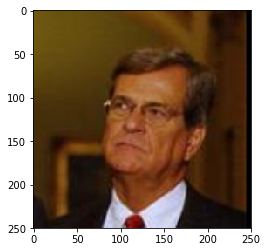

Hello Human!
You look like a ... 

Basenji !



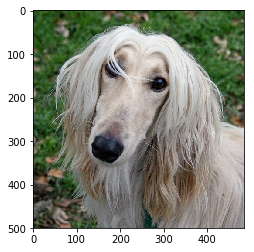

This is a dog!
This dog looks like a ... 

Chinese crested !



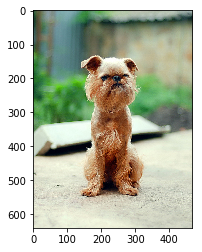

This is a dog!
This dog looks like a ... 

Brussels griffon !



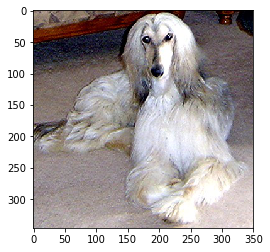

This is a dog!
This dog looks like a ... 

Portuguese water dog !



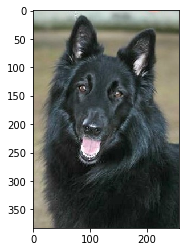

This is a dog!
This dog looks like a ... 

Belgian sheepdog !



In [40]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
import numpy as np
from glob import glob
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline 

random_humans = np.random.randint(0, high=len(human_files), size=4)
random_dogs = np.random.randint(0, high=len(dog_files), size=4)

## suggested code, below
for file in np.hstack((human_files[random_humans], dog_files[random_dogs])):
    run_app(file)